# **Salary Prediction and Analysis**

-------------

## **Objective**

The main aim of this project is to analyze the dataset and after the analysis to predict the salary of an individual give an input.

## **Data Source**

[Link of the dataset](https://drive.google.com/file/d/1_e2Cu0nEP58TOZdDakS4Io_5zoGvTUX_/view)

## **Import Library and Read the Dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('salary.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## **Describe Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Using the info() function we can see that there are no null values present in the dataset

In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


## **Data Visualization**

### **Salary Distribution**

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


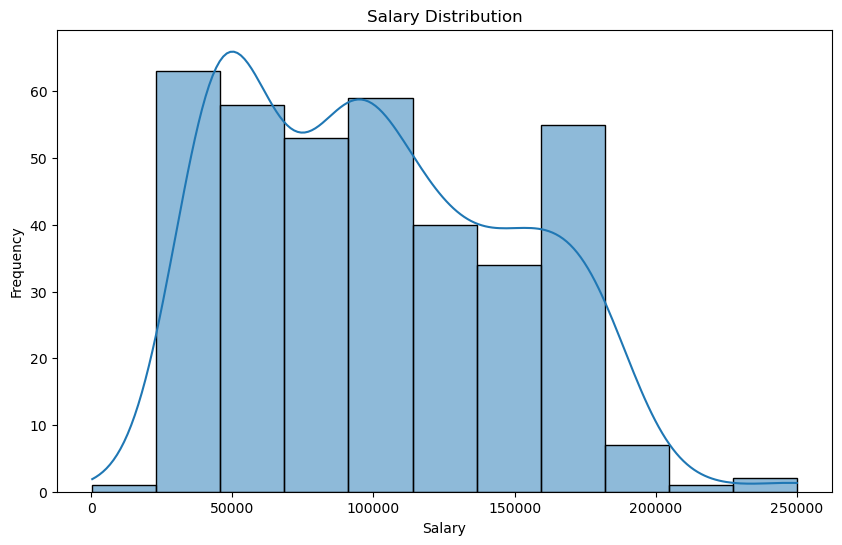

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


The distribution of salaries is right-skewed, indicating that most salaries are concentrated towards the lower end, with fewer individuals earning very high salaries.

### **Salary by Gender**

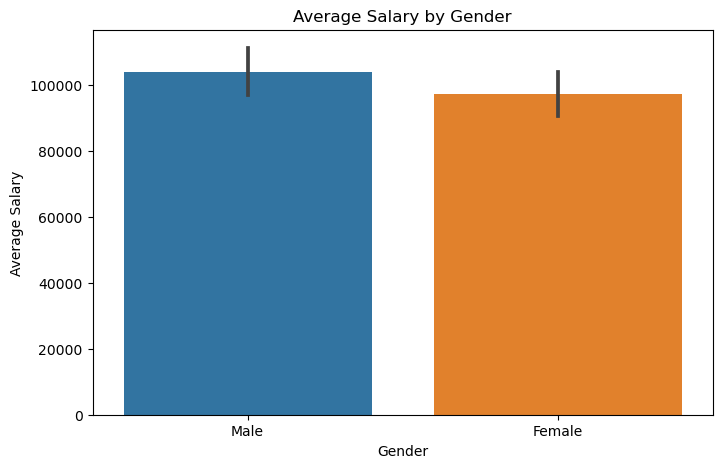

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Salary', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()


 There is a noticeable difference in average earnings between genders.

### **Salary by Education Level**

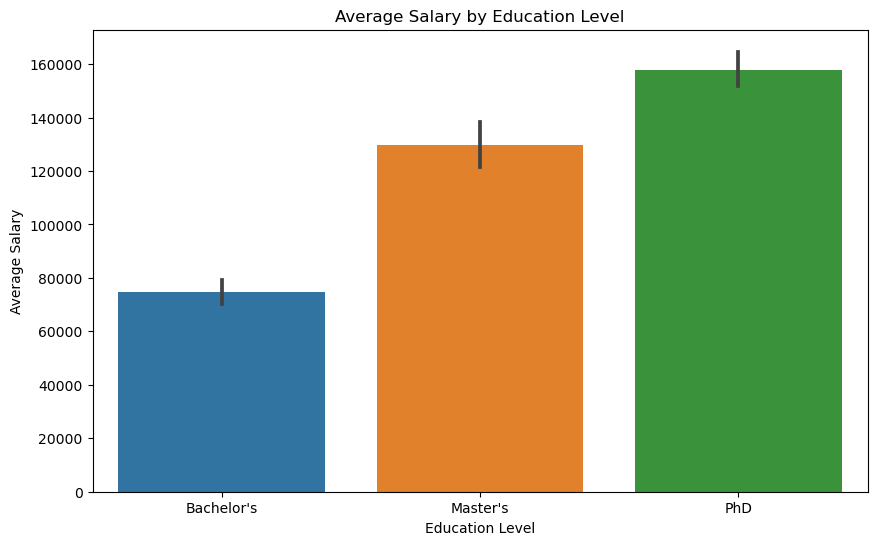

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()


There is a positive correlation between average salary and education level which means higher is the education level higher is the avg salary.

### **Salary vs. Years of Experience**

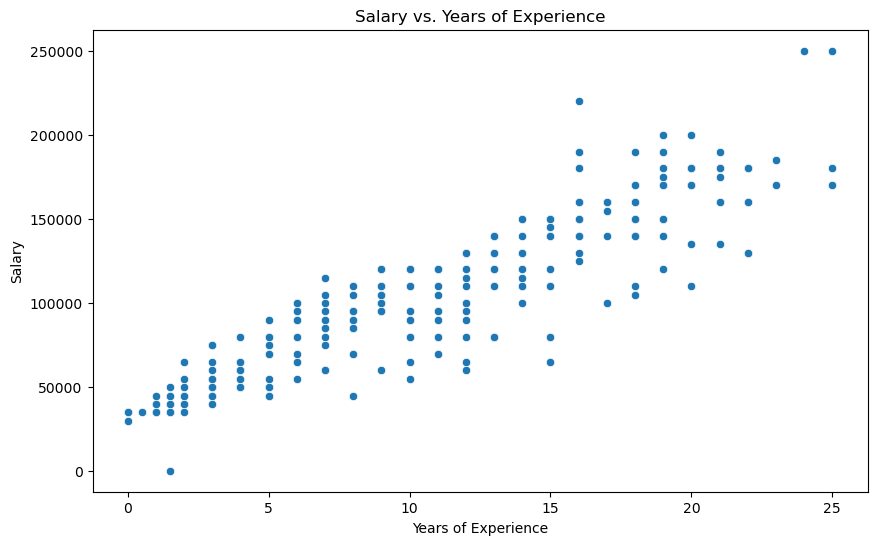

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


There is a positive correlation between years of experience and salary. As experience increases, so does the salary, but the relationship may not be perfectly linear.

### **Age Distribution**

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


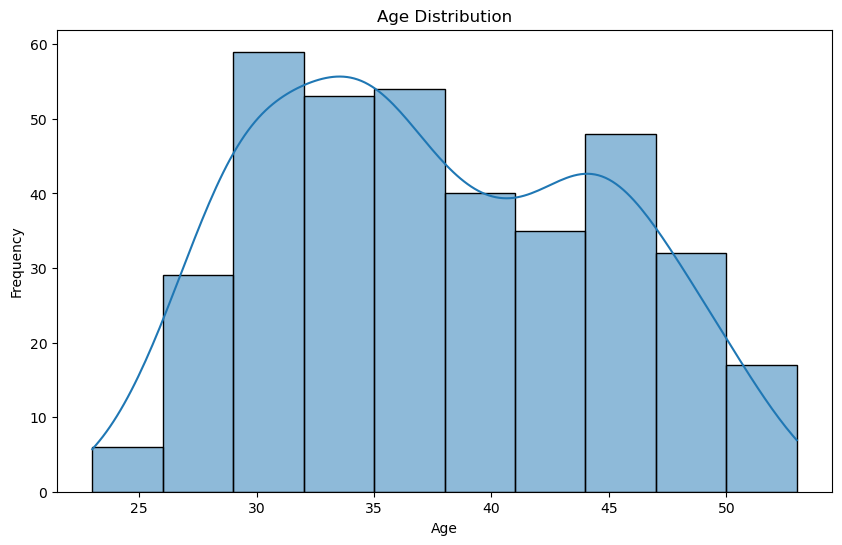

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Most individuals fall within a specific age range of approximately (30-40), with fewer very young or very old employees.

## **Data Preprocessing**

In [11]:
# Checking for null values
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

As there are only few missing values we can drop them as we have sufficient data

In [12]:
# Dropping null values
df.dropna(inplace=True)

In [13]:
# Checking for duplicated values
df.duplicated().sum()

49

In [14]:
# dropping duplicated values 
df.drop_duplicates(inplace=True)

In [15]:
df.isna().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [16]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [17]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In the above code we can see that the 'Job Title' column has many unique value so it is better to drop 

In [18]:
df.Age.unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53.])

The Age column also have many unique values so we will also drop these

In [19]:
df.Gender.value_counts()

Gender
Male      170
Female    154
Name: count, dtype: int64

In [20]:
df['Education Level'].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [21]:
# Dropping the 'Job Title' and 'Age'  column
df.drop(['Job Title','Age'],axis=1,inplace=True)

In [22]:
df.head()

,Gender,Education Level,Years of Experience,Salary
0,Male,Bachelor's,5.0,90000.0
1,Female,Master's,3.0,65000.0
2,Male,PhD,15.0,150000.0
3,Female,Bachelor's,7.0,60000.0
4,Male,Master's,20.0,200000.0


#### Encoding Categorical variables i.e Gender,Education level

According to this dataset we will label encode the 'Education level' as it is ordinal in nature i.e it has some order 
and for the 'Gender' column we will use One hot encoder as it is nominal in nature i.e male and female are only names

In [23]:
df['Education Level'].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [24]:
# Label encoding the Education level column 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education Level'] = le.fit_transform(df['Education Level'])

In [25]:
df['Education Level'].value_counts()

Education Level
0    191
1     91
2     42
Name: count, dtype: int64

0 = Bachelor's , 1 = Master's ,2 = PhD

In [27]:
# One hot encoding the Gender column 
df = pd.get_dummies(df)
df

,Education Level,Years of Experience,Salary,Gender_Female,Gender_Male
0,0,5.0,90000.0,False,True
1,1,3.0,65000.0,True,False
2,2,15.0,150000.0,False,True
3,0,7.0,60000.0,True,False
4,1,20.0,200000.0,False,True
...,...,...,...,...,...
348,0,1.0,35000.0,True,False
349,0,8.0,110000.0,False,True
350,2,16.0,160000.0,True,False
351,0,3.0,55000.0,False,True


## **Define Target Variable (y) and Feature Variables (X)**

In [28]:
df.columns

Index(['Education Level', 'Years of Experience', 'Salary', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [29]:
y = df['Salary']
x = df[['Education Level','Years of Experience','Gender_Female','Gender_Male']]

## **Train Test Split**

In [30]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x,y, random_state= 2529)

## **Modeling**

In [31]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()

from sklearn.svm import SVR
svr = SVR()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor()

## **Train Model**

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [34]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
svr.fit(x_train,y_train)

SVR()

In [36]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

## **Model Predicting**

In [37]:
y_pred_lr = lr.predict(x_test)

y_pred_knnr = knnr.predict(x_test)

y_pred_svr = svr.predict(x_test)

y_pred_dtr = dtr.predict(x_test)

y_pred_rfr = rfr.predict(x_test)

## **Model Evaluation**

### Linear Regression Evaluation

In [38]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

print(mean_absolute_percentage_error(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(mean_squared_error(y_test,y_pred_lr))

0.11654063130169802
11537.068657511534
273725989.7578723


### KNN Regression Evaluation

In [39]:
print(mean_absolute_percentage_error(y_test,y_pred_knnr))
print(mean_absolute_error(y_test,y_pred_knnr))
print(mean_squared_error(y_test,y_pred_knnr))

0.11331414262360874
11469.135802469136
318876543.20987654


### SVM Regression Evaluation

In [40]:
print(mean_absolute_percentage_error(y_test,y_pred_svr))
print(mean_absolute_error(y_test,y_pred_svr))
print(mean_squared_error(y_test,y_pred_svr))

0.5053267960434196
42425.34766762612
2600529333.6735363


###  Decision Tree Regressor Evaluation

In [41]:
print(mean_absolute_percentage_error(y_test,y_pred_dtr))
print(mean_absolute_error(y_test,y_pred_dtr))
print(mean_squared_error(y_test,y_pred_dtr))

0.10131003223309092
11046.810699588477
319998697.41849643


### Random Forest Regression Evaluation

In [42]:
print(mean_absolute_percentage_error(y_test,y_pred_rfr))
print(mean_absolute_error(y_test,y_pred_rfr))
print(mean_squared_error(y_test,y_pred_rfr))

0.10165581420926438
11026.361291277717
321260069.4061993


In [44]:
x.sample()

,Education Level,Years of Experience,Gender_Female,Gender_Male
197,2,17.0,False,True


In [47]:
lr.predict([[2,17.0,False,True]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([164850.26430777])

# Saving the model

In [48]:
from joblib import dump,load 
dump(lr, 'trained_model.joblib')

['trained_model.joblib']